In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import csv

In [2]:
# Read data
Country_Continent_df = pd.read_csv('Data/Country-Continent.csv')

#gdp_raw_df = pd.read_csv('Data/gdp-ppp-2017.csv', header=None)
  
# Calling DataFrame constructor 
column_names = ["a", "b", "c", "d", "e","f"]
#Creating the dataframe
gdp_raw_df = pd.DataFrame(columns = column_names)
  
#read cvs file into already created DF
with open('Data/gdp-ppp-2017.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        #print(row)
        a_series = pd.Series(row, index = gdp_raw_df.columns)
        gdp_raw_df = gdp_raw_df.append(a_series, ignore_index=True)
       

In [3]:
#Cleaning Data
gdp_format_df=gdp_raw_df
gdp_format_df.drop([0,1,2,3,4], axis=0,inplace=True)
gdp_format_df.reset_index(inplace=True,drop=True)
gdp_format_df['a'].replace('', np.nan, inplace=True)
gdp_format_df.dropna(subset=['a'], inplace=True)
gdp_format_df.drop(["c","f"], axis=1,inplace=True)
gdp_format_df.head()

,a,b,d,e
0,CHN,1,China,"23,350,230"
1,USA,2,United States,"19,485,394"
2,IND,3,India,"9,596,835"
3,JPN,4,Japan,"5,333,444"
4,DEU,5,Germany,"4,345,631"


In [4]:
print(gdp_format_df)

       a  b                    d           e
0    CHN  1                China  23,350,230
1    USA  2        United States  19,485,394
2    IND  3                India   9,596,835
3    JPN  4                Japan   5,333,444
4    DEU  5              Germany   4,345,631
..   ... ..                  ...         ...
228  SSF      Sub-Saharan Africa   4,072,459
229  LIC              Low income   1,580,733
230  LMC     Lower middle income  21,560,544
231  UMC     Upper middle income  46,039,936
232  HIC             High income  59,791,144

[229 rows x 4 columns]


In [6]:
#Getting location to split read file into two pieces
Index_pos = gdp_format_df.a[gdp_format_df.a == 'WLD'].index.tolist()
Index_pos2 = gdp_format_df.a[gdp_format_df.a == 'LIC'].index.tolist()
Index_pos3 = gdp_format_df.a[gdp_format_df.a == 'TUV'].index.tolist()

#Getting only Country Data
gdp_country_df = gdp_format_df.truncate(after=Index_pos3[0])

#Getting only region data including WLD
gdp_region_df = gdp_format_df.truncate(before=Index_pos[0],after=Index_pos2[0]-1)

#Restting Index back to 0
gdp_region_df.reset_index(inplace=True,drop=True)

gdp_country_df.rename(columns={'a': 'country_code', 'b': 'rank', 'd': 'country_name', 'e': 'gdp'}, inplace=True)
gdp_region_df.rename(columns={'a': 'region_code', 'b': 'rank', 'd': 'region_name', 'e': 'region_gdp'}, inplace=True)
gdp_region_df.head(20)

,region_code,rank,region_name,region_gdp
0,WLD,,World,"128,755,600"
1,EAS,,East Asia & Pacific,"41,946,676"
2,ECS,,Europe & Central Asia,"30,688,963"
3,LCN,,Latin America & Caribbean,"10,258,018"
4,MEA,,Middle East & North Africa,"8,864,772"
5,NAC,,North America,"21,196,625"
6,SAS,,South Asia,"11,766,663"
7,SSF,,Sub-Saharan Africa,"4,072,459"


In [7]:
# Read data population file World-Pop-2017
World_pop_df = pd.read_csv('Data/World-Pop-2017.csv')
World_pop_df['Country Code'].replace('', np.nan, inplace=True)
World_pop_df.dropna(subset=['Country Code'], inplace=True)
World_pop_df.drop(['Series Name','Series Code','Country Name'], axis = 1, inplace=True)
World_pop_df.rename(columns = {'2017 [YR2017]': 'Population 2017'}, inplace=True)
World_pop_df

,Country Code,Population 2017
0,AFG,36296400
1,ALB,2873457
2,DZA,41389198
3,ASM,55620
4,AND,77001
...,...,...
254,PSE,4454805
255,WLD,7509065705
256,YEM,27834821
257,ZMB,16853688


In [8]:
gdp_format_df.drop([0,1,2,3,4], axis=0,inplace=True)
gdp_region_df['region_gdp'] = gdp_region_df['region_gdp'].str.replace(',', '') # remove commas from data
gdp_region_df['region_gdp'] = gdp_region_df['region_gdp'].astype(int)
gdp_region_df

,region_code,rank,region_name,region_gdp
0,WLD,,World,128755600
1,EAS,,East Asia & Pacific,41946676
2,ECS,,Europe & Central Asia,30688963
3,LCN,,Latin America & Caribbean,10258018
4,MEA,,Middle East & North Africa,8864772
5,NAC,,North America,21196625
6,SAS,,South Asia,11766663
7,SSF,,Sub-Saharan Africa,4072459


In [9]:
gdp_country_df

,country_code,rank,country_name,gdp
0,CHN,1,China,"23,350,230"
1,USA,2,United States,"19,485,394"
2,IND,3,India,"9,596,835"
3,JPN,4,Japan,"5,333,444"
4,DEU,5,Germany,"4,345,631"
...,...,...,...,...
186,PLW,187,Palau,323
187,KIR,188,Kiribati,254
188,MHL,189,Marshall Islands,226
189,NRU,190,Nauru,194


In [10]:
# clean convert gdp to integer
gdp_country_df['gdp'] = gdp_country_df['gdp'].str.replace(',', '') # remove commas from data
gdp_country_df['gdp'] = gdp_country_df['gdp'].astype(int)
gdp_country_df

,country_code,rank,country_name,gdp
0,CHN,1,China,23350230
1,USA,2,United States,19485394
2,IND,3,India,9596835
3,JPN,4,Japan,5333444
4,DEU,5,Germany,4345631
...,...,...,...,...
186,PLW,187,Palau,323
187,KIR,188,Kiribati,254
188,MHL,189,Marshall Islands,226
189,NRU,190,Nauru,194


In [11]:
Country_Continent_df

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


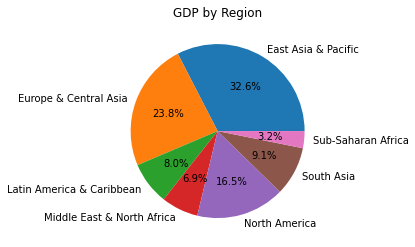

In [12]:
# Create pie graph from regions using gdp_region_df cleaned data
gdp_region = gdp_region_df.drop(0, axis = 0)
region = gdp_region['region_name']
sizes = gdp_region['region_gdp']
plt.pie(sizes, labels = region, autopct="%1.1f%%")
plt.title('GDP by Region')
plt.show()

Text(0.5, 1.0, 'Total GDP- Top 10 Countires in 2017')

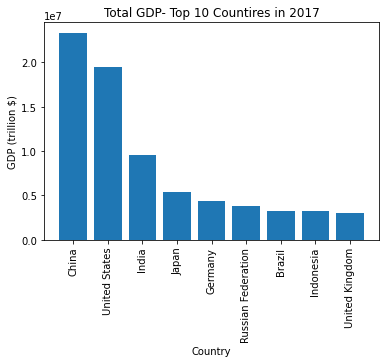

In [13]:
# bar graph of top 10 countries by total GDP
x_axis = gdp_country_df.iloc[0:9,2]
y_axis = gdp_country_df.iloc[0:9,3]
plt.bar(x_axis, y_axis)
tick_locations = [x for x in range(len(x_axis))]
plt.xticks(tick_locations, x_axis, rotation="vertical") 
plt.xlabel("Country")
plt.ylabel('GDP (trillion $)')
plt.title("Total GDP- Top 10 Countires in 2017")
plt.show()

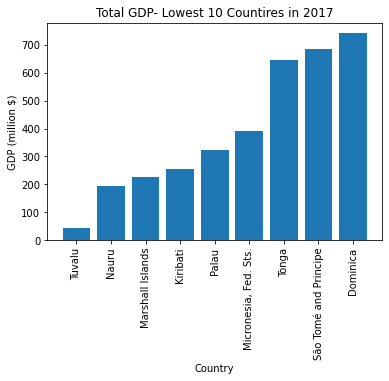

In [21]:
# bar graph of lowest 10 countries by total GDP
gdp_country_low_df =  gdp_per_capita.sort_values(by = ['gdp'], ascending = True)
x_axis_low = gdp_country_low_df.iloc[0:9,2]
y_axis_low = gdp_country_low_df.iloc[0:9,3]
plt.bar(x_axis_low , y_axis_low )
tick_locations = [x for x in range(len(x_axis_low ))]
plt.xticks(tick_locations, x_axis_low , rotation="vertical") 
plt.xlabel("Country")
plt.ylabel('GDP (million $)')
plt.title("Total GDP- Lowest 10 Countires in 2017")
plt.show()

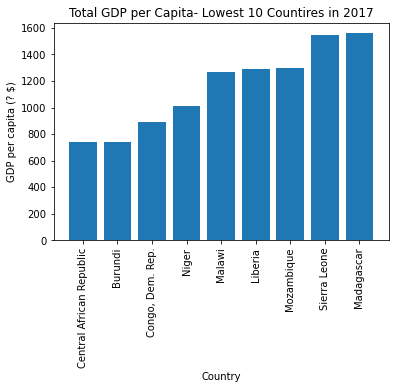

,country_code,rank,country_name,gdp,Country Code,Population 2017,per capita
0,CHN,1,China,23350230,CHN,1386395000,16842.407827
1,USA,2,United States,19485394,USA,324985539,59957.726304
2,IND,3,India,9596835,IND,1338658835,7168.992389
3,JPN,4,Japan,5333444,JPN,126785797,42066.573119
4,DEU,5,Germany,4345631,DEU,82657002,52574.263460
...,...,...,...,...,...,...,...
186,PLW,187,Palau,323,PLW,17808,18137.915544
187,KIR,188,Kiribati,254,KIR,114158,2224.986422
188,MHL,189,Marshall Islands,226,MHL,58058,3892.659065
189,NRU,190,Nauru,194,NRU,12876,15066.790929


In [28]:
# Merge GDP with population to calculate per capita GDP lowest 20 countries
gdp_per_capita = pd.merge(gdp_country_df, World_pop_df, left_on = 'country_code', right_on ='Country Code', how = 'left')
gdp_per_capita['Population 2017'] = gdp_per_capita['Population 2017'].astype(int)
gdp_per_capita['per capita'] = gdp_per_capita['gdp'] / gdp_per_capita['Population 2017'] * 1000000
country_percap_lowest = gdp_per_capita.sort_values(by = ['per capita'], ascending = True)

x_axis_gdplow = country_percap_lowest.iloc[0:9,2]
y_axis_gdplow = country_percap_lowest.iloc[0:9,6]
plt.bar(x_axis_gdplow, y_axis_gdplow)
tick_locations = [x for x in range(len(x_axis_gdplow))]
plt.xticks(tick_locations, x_axis_gdplow, rotation="vertical") 
plt.xlabel("Country")
plt.ylabel('GDP per capita (? $)')
plt.title("Total GDP per Capita- Lowest 10 Countires in 2017")
# print(country_percap_lowest.head(10))
plt.show()
gdp_per_capita

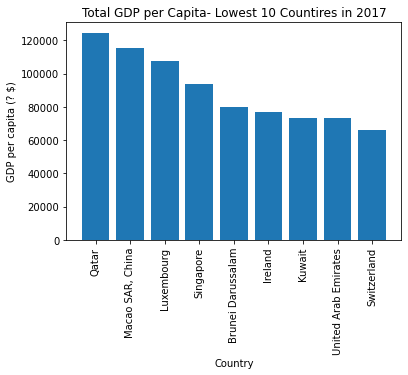

,country_code,rank,country_name,gdp,Country Code,Population 2017,per capita
48,QAT,49,Qatar,339526,QAT,2724724,124609.318228
97,MAC,98,"Macao SAR, China",71824,MAC,622585,115364.167142
102,LUX,103,Luxembourg,64190,LUX,596336,107640.658957
37,SGP,38,Singapore,528139,SGP,5612253,94104.631420
123,BRN,124,Brunei Darussalam,33869,BRN,424473,79790.705180
47,IRL,48,Ireland,369243,IRL,4807388,76807.405602
56,KWT,57,Kuwait,298226,KWT,4056099,73525.325689
30,ARE,31,United Arab Emirates,695942,ARE,9487203,73355.866845
36,CHE,37,Switzerland,560354,CHE,8451840,66299.645994
174,SMR,175,San Marino,2123,SMR,33671,63051.290428


In [27]:
# Highest countries with per capita
gdp_per_capita.sort_values(by = ['per capita'], ascending = False, inplace = True)
gdp_per_capita.head(20)

x_axis_capitamax = gdp_per_capita.iloc[0:9,2]
y_axis_capitamax = gdp_per_capita.iloc[0:9,6]
plt.bar(x_axis_capitamax, y_axis_capitamax)
tick_locations = [x for x in range(len(x_axis_capitamax))]
plt.xticks(tick_locations, x_axis_capitamax, rotation="vertical") 
plt.xlabel("Country")
plt.ylabel('GDP per capita (? $)')
plt.title("Total GDP per Capita- Lowest 10 Countires in 2017")
plt.show()
# gdp_per_capita.head(20)

In [34]:
# world heat map for GDP per capita using plotly
import plotly.express as px
fig = px.choropleth(gdp_per_capita, locations='Country Code', 
                        color='per capita',
                        hover_name="country_name", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [ ]:
# world heat map for GDP using plotly
import plotly.express as px
fig = px.choropleth(gdp_per_capita, locations='Country Code', 
                        color='gdp',
                        hover_name="country_name", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.Plasma)
fig.show()